In [51]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import os
os.chdir("D:\\Machinelearning\\csv")

In [52]:
df=pd.read_csv("pcos.csv")

In [53]:
df=df.drop(["Sl. No","Patient File No.","PRG","RBS","bpsystolic","BPDiastolic","LH","FSH/LH","betaHCG2","betaHCG1","FSH","Endometrium","FollicleNos","FollicleNo","af","Avgsize","Cycle","ms","VitD3"],axis=1)

In [54]:
df=df.dropna(subset=['Fastfood'])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 540
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PCOS               540 non-null    int64  
 1   Age                540 non-null    int64  
 2   w                  540 non-null    float64
 3   h                  540 non-null    float64
 4   BMI                540 non-null    float64
 5   BloodGroup         540 non-null    int64  
 6   Pulserate          540 non-null    int64  
 7   rr                 540 non-null    int64  
 8   hb                 540 non-null    float64
 9   Cyclelength        540 non-null    int64  
 10  Pregnant           540 non-null    int64  
 11  abortions          540 non-null    int64  
 12  Hip                540 non-null    int64  
 13  Waist              540 non-null    int64  
 14  Waistohip          540 non-null    float64
 15  TSH                540 non-null    float64
 16  AMH                540 non

C:\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PCOS', ylabel='count'>

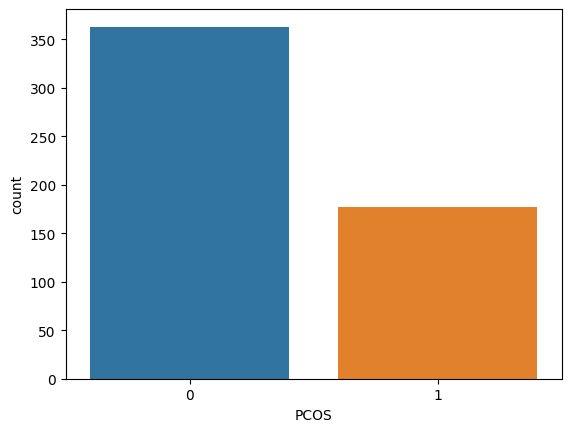

In [7]:
sns.countplot(df['PCOS'])

<AxesSubplot:ylabel='PCOS'>

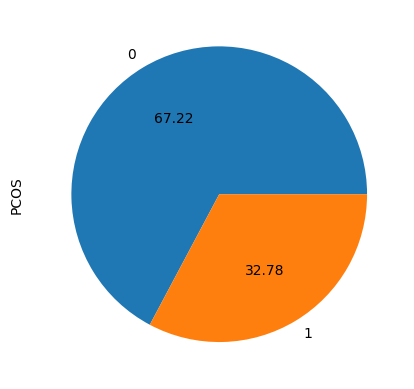

In [10]:
df['PCOS'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:>

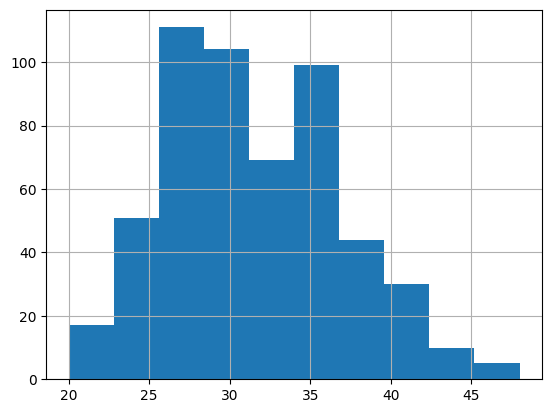

In [15]:
df['Age'].hist(bins=10)

C:\python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='w', ylabel='Density'>

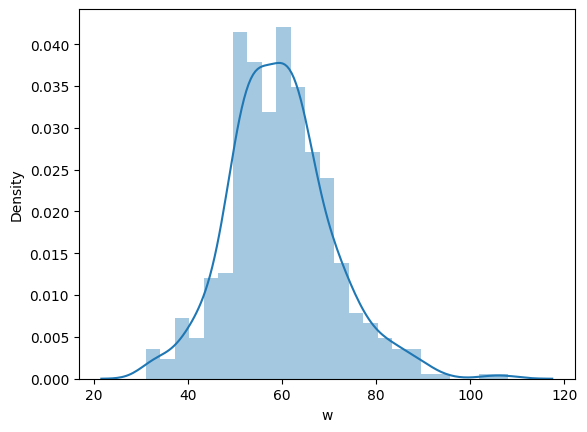

In [17]:
sns.distplot(df['w'])

C:\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='h'>

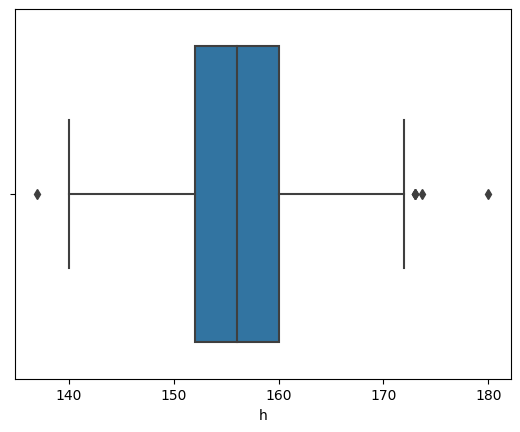

In [20]:
sns.boxplot(df['h'])

C:\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='w', ylabel='h'>

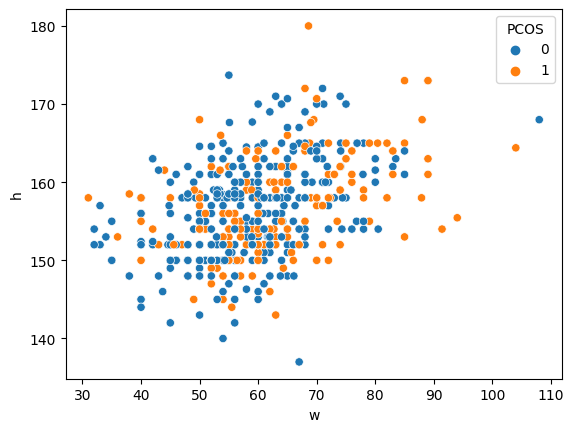

In [30]:
sns.scatterplot(df['w'],df['h'],hue=df['PCOS'])

C:\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PCOS', ylabel='Age'>

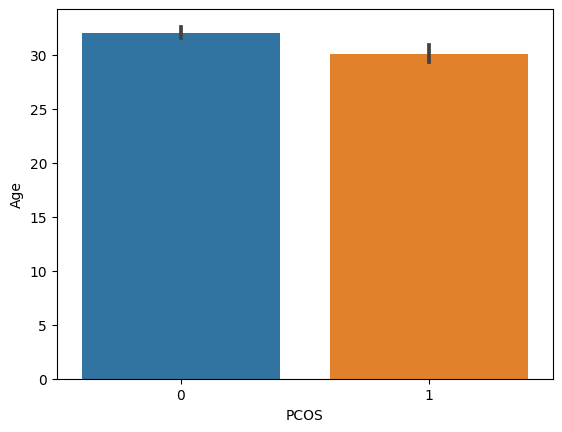

In [33]:
sns.barplot(df['PCOS'],df['Age'])

C:\python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

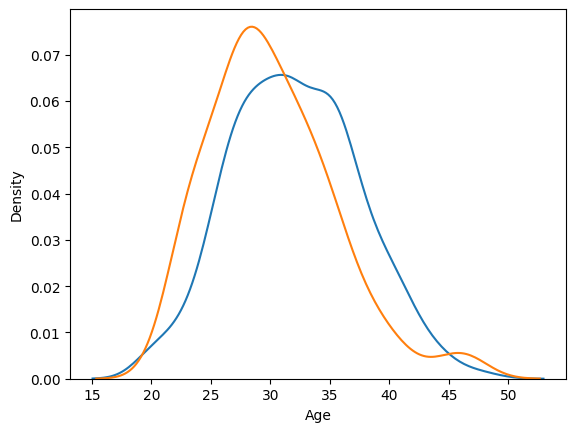

In [36]:
sns.distplot(df[df['PCOS']==0]['Age'],hist=False)
sns.distplot(df[df['PCOS']==1]['Age'],hist=False)

In [38]:
pd.crosstab(df['PCOS'],df['Weightgain'])

Weightgain,0,1
PCOS,,
0,280,83
1,56,121


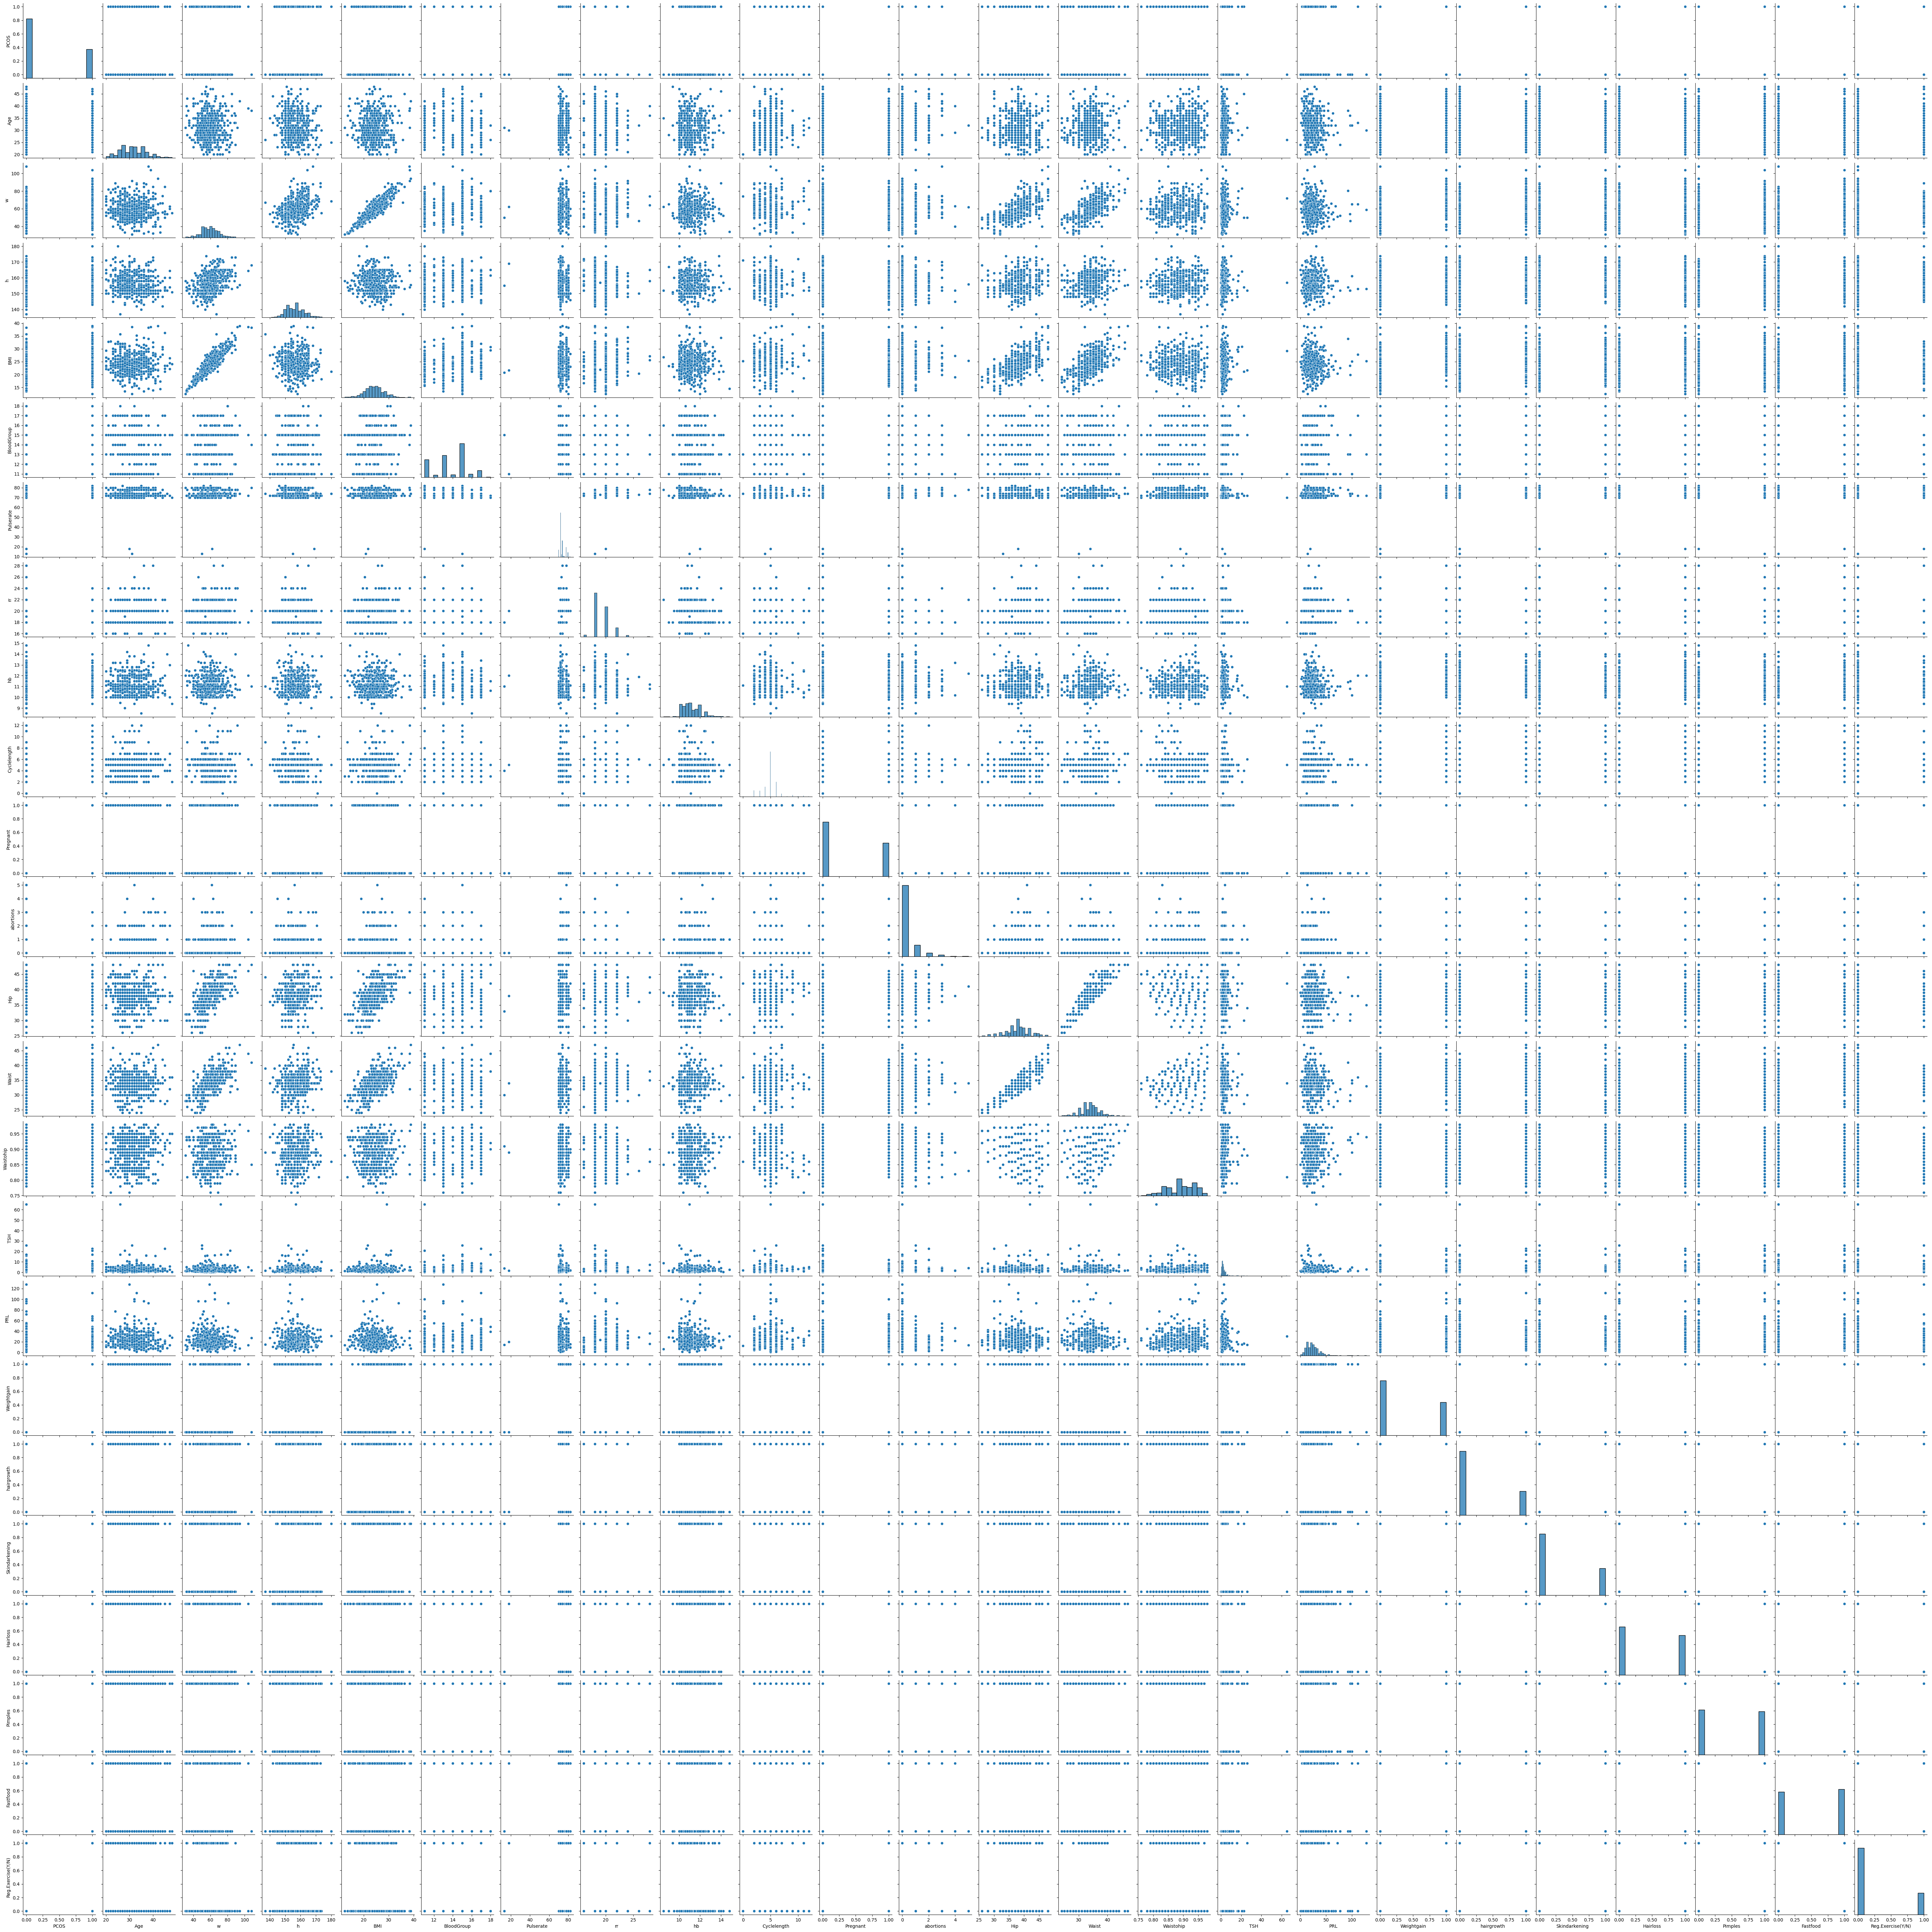

In [39]:
sns.pairplot(df)

In [22]:
df['Age'].max()

48

In [24]:
df['w'].skew()

0.5123584683758982

In [56]:
x=df[['w','h','Pregnant','abortions','Weightgain','Skindarkening','TSH','Hairloss','Fastfood']]

In [57]:
x.shape

(540, 9)

In [58]:
y=df['PCOS']
y.shape

(540,)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [60]:
x_train.isnull().sum()

w                0
h                0
Pregnant         0
abortions        0
Weightgain       0
Skindarkening    0
TSH              0
Hairloss         0
Fastfood         0
dtype: int64

In [1156]:
x_train.mean()

w                 59.554167
h                156.835213
Pregnant           0.370370
abortions          0.300926
Weightgain         0.375000
Skindarkening      0.298611
TSH                2.894266
Hairloss           0.453704
Fastfood           0.504630
dtype: float64

In [11]:
#from sklearn.preprocessing import MaxAbsScaler
#scaler=MaxAbsScaler()
#scaler.fit(x_train)
#x_train_scaled=scaler.transform(x_train)
#x_test_scaled=scaler.transform(x_test)

In [12]:
x_train_scaled=pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [1159]:
np.round(x_train.describe(),1)

,w,h,Pregnant,abortions,Weightgain,Skindarkening,TSH,Hairloss,Fastfood
count,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0
mean,59.6,156.8,0.4,0.3,0.4,0.3,2.9,0.5,0.5
std,10.9,6.2,0.5,0.7,0.5,0.5,2.8,0.5,0.5
min,31.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,52.0,152.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0
50%,59.0,157.0,0.0,0.0,0.0,0.0,2.2,0.0,1.0
75%,65.0,161.0,1.0,0.0,1.0,1.0,3.5,1.0,1.0
max,108.0,180.0,1.0,5.0,1.0,1.0,25.9,1.0,1.0


In [1160]:
np.round(x_train_scaled.describe(),1)

,w,h,Pregnant,abortions,Weightgain,Skindarkening,TSH,Hairloss,Fastfood
count,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0
mean,0.6,0.9,0.4,0.1,0.4,0.3,0.1,0.5,0.5
std,0.1,0.0,0.5,0.1,0.5,0.5,0.1,0.5,0.5
min,0.3,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.5,0.8,0.0,0.0,0.0,0.0,0.1,0.0,0.0
50%,0.5,0.9,0.0,0.0,0.0,0.0,0.1,0.0,1.0
75%,0.6,0.9,1.0,0.0,1.0,1.0,0.1,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [1161]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#x_train_scaled=sc.fit(x_train)
#x_train_scaled=sc.transform(x_train)
#x_test=sc.transform(x_test)

In [1162]:
#sc.mean_

In [1163]:
#x_train_scaled=pd.DataFrame(x_train_scaled, columns=x_train.columns)

In [1164]:
#x_train_scaled.describe()

In [1165]:
#np.round(x_train_scaled.describe(),1)

In [61]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)


In [62]:
classifier.fit(x_train, y_train)

C:\python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [63]:
y_pred=classifier.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score


In [65]:
print(accuracy_score(y_test,y_pred))

0.7222222222222222


<AxesSubplot:>

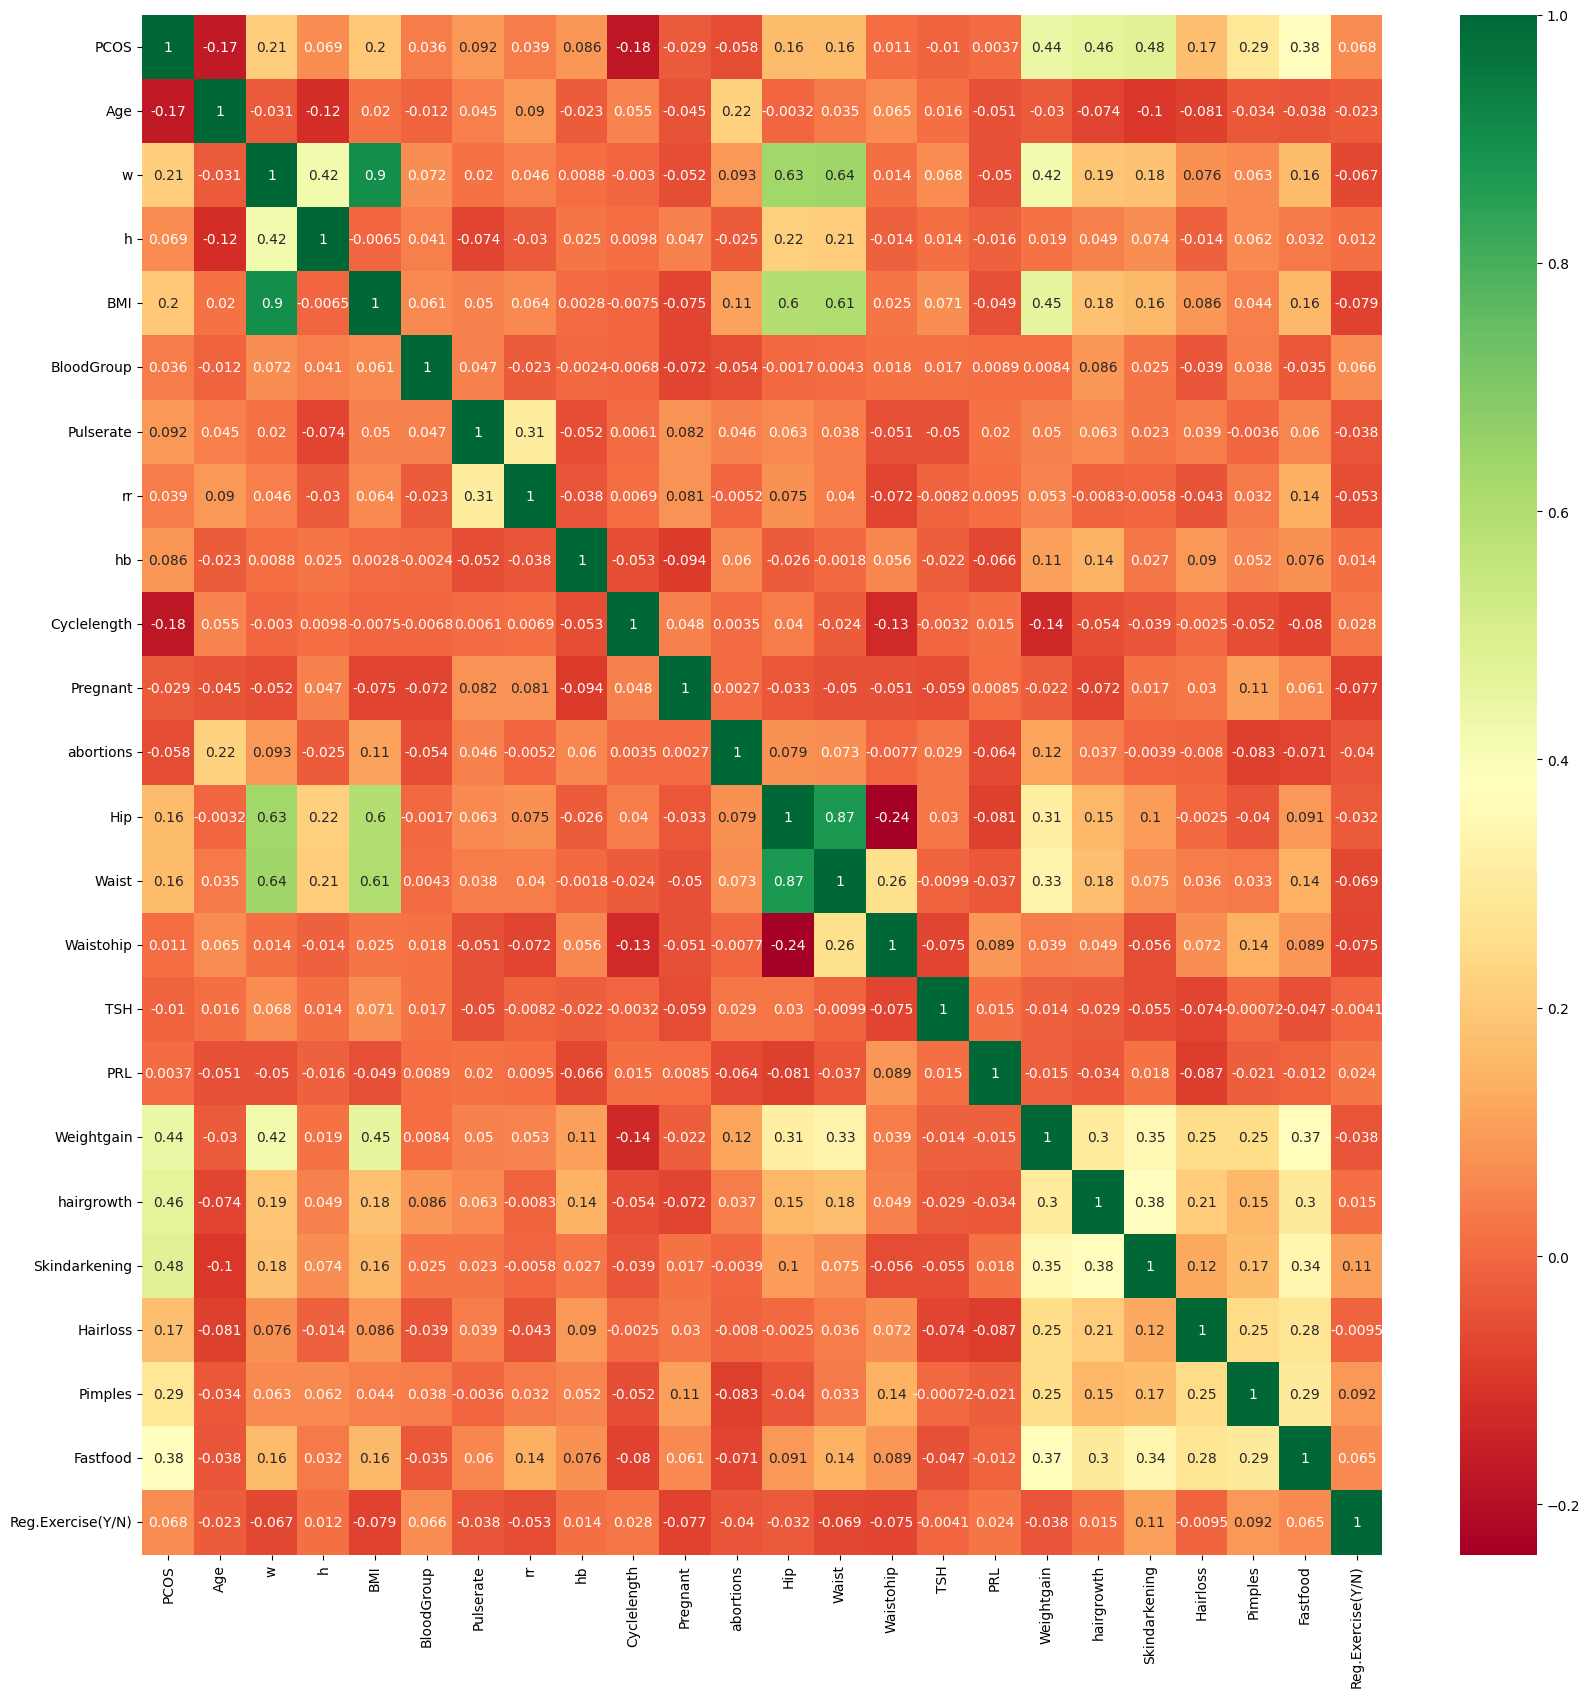

In [1171]:
corrmap=df.corr()
top_corr=corrmap.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr].corr(),annot=True,cmap='RdYlGn')
g

C:\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


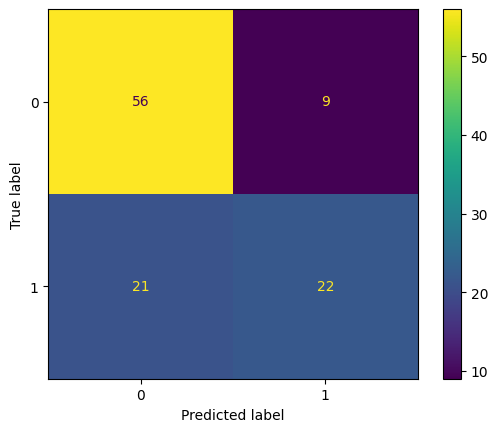

In [85]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,x_test,y_test)
plt.show()

In [88]:
new_data=[[71,163,1,2,0,0,0,0,2.56]]


In [89]:
predictions=classifier.predict(new_data)
print(predictions)

[0]


C:\python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [84]:
import pickle
filename='model.pkl'
pickle.dump(classifier,open(filename,'wb'))